# We will create some random data and we will understand how to transform data into Polynomials using PolynomialFeatures class

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#we will generate some random data -->random module
x = np.random.rand(100,2) #it generates randomvalues [0,1)
#x

In [29]:
#based on above data we will create set of points along with target
#we wanted to generate some non-linear data
m = 100 #datapoints
x = 6*np.random.rand(m,1)-1
x.shape


(100, 1)

In [25]:
#same using above input we will create a 2degree equation(ax^2+bx+c)
y = -0.5*x**2 + x + 2 + np.random.rand(m,1)
#y

In [6]:
#let us try to fit Linear Regression to the abve sample generated data
from sklearn.linear_model import LinearRegression

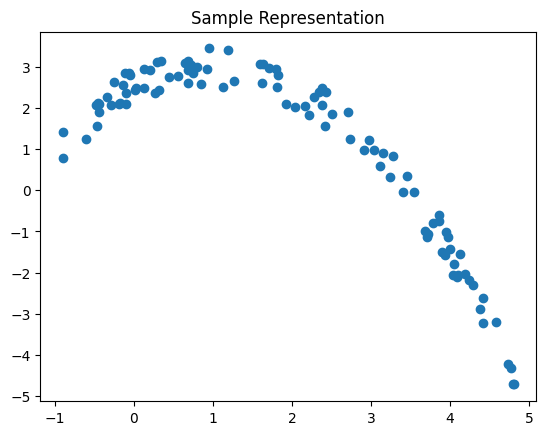

In [7]:
#now let's try to fit the data to the model before let's visualize
plt.scatter(x,y)
plt.title("Sample Representation")
plt.show()

In [8]:
#by above graph we can say a straight line will not fit the data pattern
#model fitting part 
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [26]:
print(dir(model)) #will return methods available in LinearRegression

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [10]:
print(model.coef_)
print(model.intercept_) #you can check  in your y variable 

[[-1.01340649]]
[2.99475435]


In [11]:
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
predict = model.predict(x)
predict

array([[-0.28863825],
       [-1.86752135],
       [ 0.01443752],
       [ 3.41439645],
       [ 1.22218826],
       [-0.70660919],
       [-1.86252845],
       [ 2.27694497],
       [ 0.06467927],
       [-1.12373512],
       [ 1.33572589],
       [ 0.82082075],
       [ 2.86771501],
       [ 3.94034603],
       [ 1.85036181],
       [-0.60478298],
       [-0.46552058],
       [ 1.2816387 ],
       [ 0.93908815],
       [ 1.2129043 ],
       [ 0.15365197],
       [ 2.07056737],
       [ 0.402307  ],
       [ 2.41790144],
       [-1.28995611],
       [ 3.54329778],
       [ 1.9829236 ],
       [ 3.17636432],
       [ 2.13083321],
       [-1.34842805],
       [ 1.13355576],
       [ 1.17519501],
       [ 2.41315762],
       [ 1.5938702 ],
       [ 3.05170433],
       [ 1.32352051],
       [-0.78926227],
       [-1.22865017],
       [ 0.52566919],
       [-0.62958893],
       [-0.702545  ],
       [ 2.15711157],
       [ 0.11271911],
       [ 1.24258525],
       [-1.31437972],
       [ 2

In [13]:
print("Mean Squared Error is",mean_squared_error(y,predict))
print("R-Squared value is",r2_score(y,predict))

Mean Squared Error is 1.4878015220639258
R-Squared value is 0.67666555583287


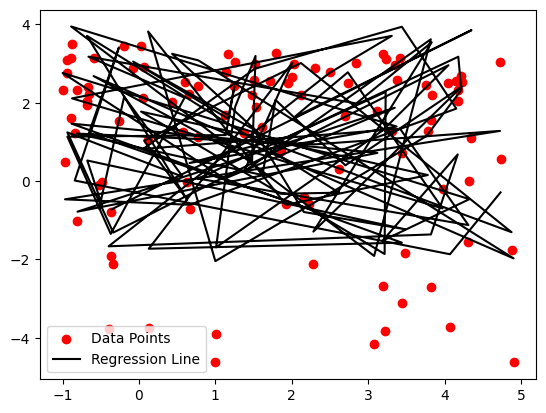

In [32]:
#Once we evaluated the metrics we can visualize whether the Regression model
#has delivered best fit line or not
plt.scatter(x,y,color="red",label="Data Points")
plt.plot(x,predict,color="black",label = "Regression Line")
plt.legend() #to display the labels
plt.show()

# As we can observed above Regression Line is not the Best Fit line as it is unable to capture the data patterns
# we will transform the data to PolynomialFeatures

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly = PolynomialFeatures(degree=2,include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [17]:
x[0]

array([-0.24658247])

In [18]:
x_poly = poly.fit_transform(x) #transforming input data
x_poly[0]

array([-0.24658247,  0.06080291])

In [19]:
#as we have transformed the data
poly.n_output_features_

2

In [20]:
#we have just transformed the data by using PolynomialFeatures class now
#we will fit LinearRegression to the data
poly_model = LinearRegression()
poly_model.fit(x_poly,y)

LinearRegression()

In [21]:
#check the metrics (MSE,R-Score)
poly_pred = poly_model.predict(x_poly)
#MSE and R-Squared value
print("Mean Squared Error is",mean_squared_error(y,poly_pred))
print("R-Squred value is",r2_score(y,poly_pred))

Mean Squared Error is 0.08166877435228517
R-Squred value is 0.98225144458491


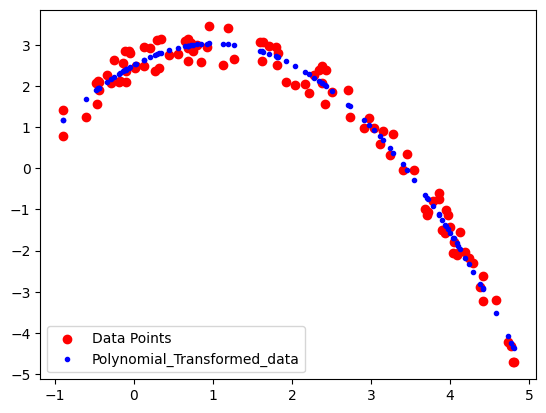

In [22]:
#let's visualize it and understand how data patterns are captured
plt.scatter(x,y,color="red",label = "Data Points")
plt.plot(x,poly_pred,'.',color='blue',label = "Polynomial_Transformed_data")
plt.legend() #display the labels
plt.show()
#Based on below graph we can clearly state that curve will be a proper fit for our data

# Task -->Jan 3rd 2024
# Based on above understanding transform using PolynomialFeatures for WebScraped House pricing data then
# while you divide the data into training & test data (train_test_split)
# use poly fit_transform for x_train and only transform for x_test
# Apply Linear Regression to it and then check the metrics